<a href="https://colab.research.google.com/github/lazy-wolf/Sample/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")
])
m.build([None, 128, 128, 3])


In [ ]:
m.dtype

'float32'

In [ ]:
hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")
])

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].dtype

dtype('float64')

In [ ]:
len(x_train)

60000

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
help(model.build)

Help on method build in module keras.src.engine.sequential:

build(input_shape=None) method of keras.src.engine.sequential.Sequential instance
    Builds the model based on input shapes received.
    
    This is to be used for subclassed models, which do not know at
    instantiation time what their inputs look like.
    
    This method only exists for users who want to call `model.build()` in a
    standalone way (as a substitute for calling the model on real data to
    build it). It will never be called by the framework (and thus it will
    never throw unexpected errors in an unrelated workflow).
    
    Args:
     input_shape: Single tuple, `TensorShape` instance, or list/dict of
       shapes, where shapes are tuples, integers, or `TensorShape`
       instances.
    
    Raises:
      ValueError:
        1. In case of invalid user-provided data (not of type tuple,
           list, `TensorShape`, or dict).
        2. If the model requires call arguments that are agnostic
      

In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"), # Layer 1 (input layer), TensorFlow Hub layer, requires Kaggle internet setting turned on

  # Layer 1 (input layer), TensorFlow Hub layer, requires Kaggle internet setting turned on
    tf.keras.layers.Dense(units=1001,
                          activation="relu"),
    # Layer 2 (dense layer)
    tf.keras.layers.Dense(units=64,
                          activation="relu"),
    # Layer 3 (output layer)
    tf.keras.layers.Dense(units=10,
                          activation="softmax") # Layer 2 (output layer)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
    optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
    metrics=["accuracy"] # We'd like this to go up
)

# Build the model
model.build([None, 128, 128, 3])

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_30 (KerasLayer  (None, 1001)              1692489   
 )                                                               
                                                                 
 dense_23 (Dense)            (None, 1001)              1003002   
                                                                 
 dense_24 (Dense)            (None, 64)                64128     
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 2760269 (10.53 MB)
Trainable params: 1067780 (4.07 MB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")
])
m.build([None, 128, 128, 3])

In [ ]:
m.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_27 (KerasLayer  (None, 1001)              1692489   
 )                                                               
                                                                 
Total params: 1692489 (6.46 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [5]:
%pwd

'/content'

In [13]:
import tensorflow as tf
print(tf.__version__)
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

2.13.0
170498071/170498071 [==============================] - 2s 0us/step


In [14]:
train_x.shape

(50000, 32, 32, 3)

In [18]:
train_X = train_x.resize(128,128,3)

ValueError: ignored

In [31]:
train_X = np.resize(train_x, (50000,128,128,3))
test_X = np.resize(test_x,(10000,128,128,3))

In [38]:
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

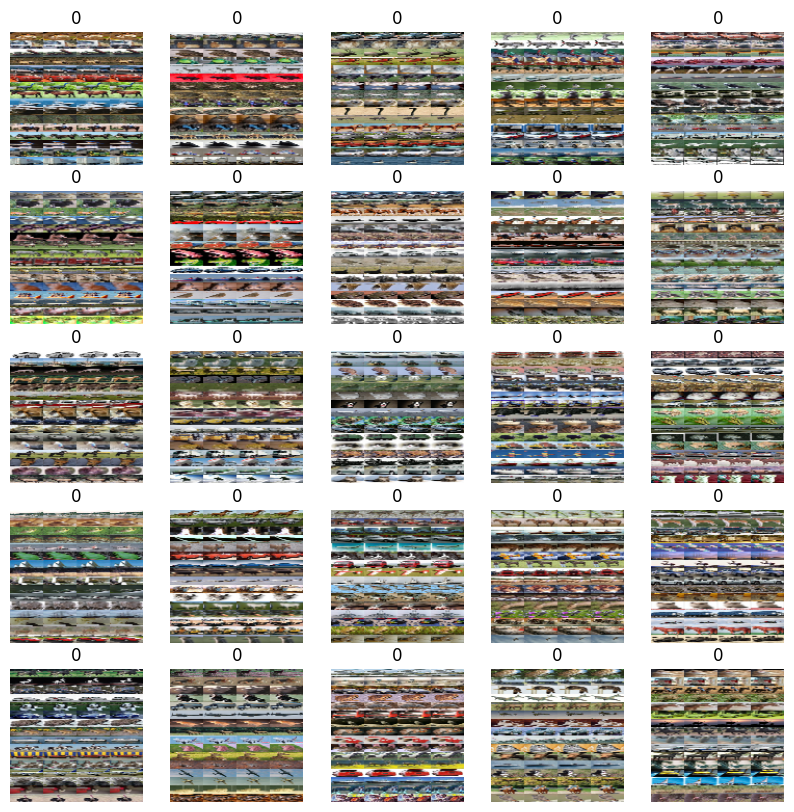

In [44]:
# train_X, test_x = next(train_data.as_numpy_iterator())
show_25_images(train_X, train_y)

In [43]:
unique_breeds = np.unique(train_y)